<a href="https://colab.research.google.com/github/divyani95/Radiation_Analysis/blob/main/ReportAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# File path for the Excel file
file_path = '/content/Book1.xlsx'

# Manually defined column names for WMS12
manual_columns_wms12 = [
    'Time Stamp', 'Radiation GHI', 'Radiation GII', 'Radiation GHI Acc',
    'Radiation GII Acc', 'Wind Speed', 'Wind Direction', 'Humidity',
    'Ambient Temperature', 'Module Temperature', 'Rain', 'Diffuse Radiation',
    'Today Rain'
]

In [ ]:
# Load and clean data from both sheets
data_sheets = {
    'WMS12': pd.read_excel(file_path, sheet_name='WMS12', skiprows=1, names=manual_columns_wms12),
    'WMS26': pd.read_excel(file_path, sheet_name='WMS26')
}

# Clean column names for WMS26
for sheet, data in data_sheets.items():
    data.columns = data.columns.str.strip().str.replace("\n", " ", regex=True)

In [ ]:
# Function to plot time series
def plot_time_series(data, columns, sheet_name):
    # Remove rows where 'Time Stamp' is not a valid datetime
    data = data[data['Time Stamp'].notna()]
    data['Time Stamp'] = pd.to_datetime(data['Time Stamp'], errors='coerce')
    data = data.dropna(subset=['Time Stamp'])  # Remove rows with invalid datetime

    # Set 'Time Stamp' as the index
    data.set_index('Time Stamp', inplace=True)

    # Plot time series for the selected columns
    plt.figure(figsize=(12, 6))
    for col in columns:
        if col in data.columns:
            plt.plot(data.index, data[col], label=col)
    plt.title(f"Time Series Analysis - {sheet_name}")
    plt.xlabel("Time")
    plt.ylabel("Values")
    plt.legend()
    plt.grid()
    plt.show()

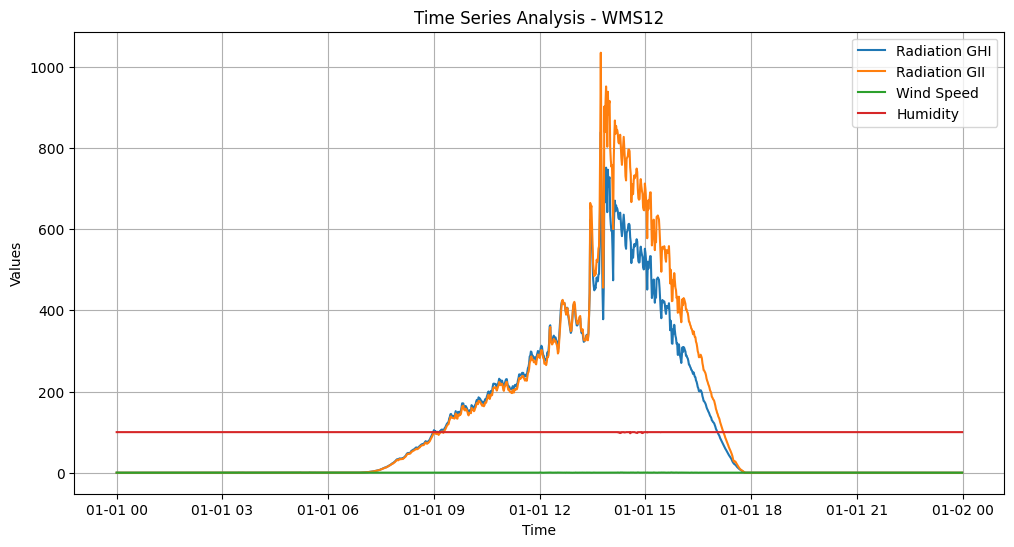

<ipython-input-18-490462d20c59>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Time Stamp'] = pd.to_datetime(data['Time Stamp'], errors='coerce')


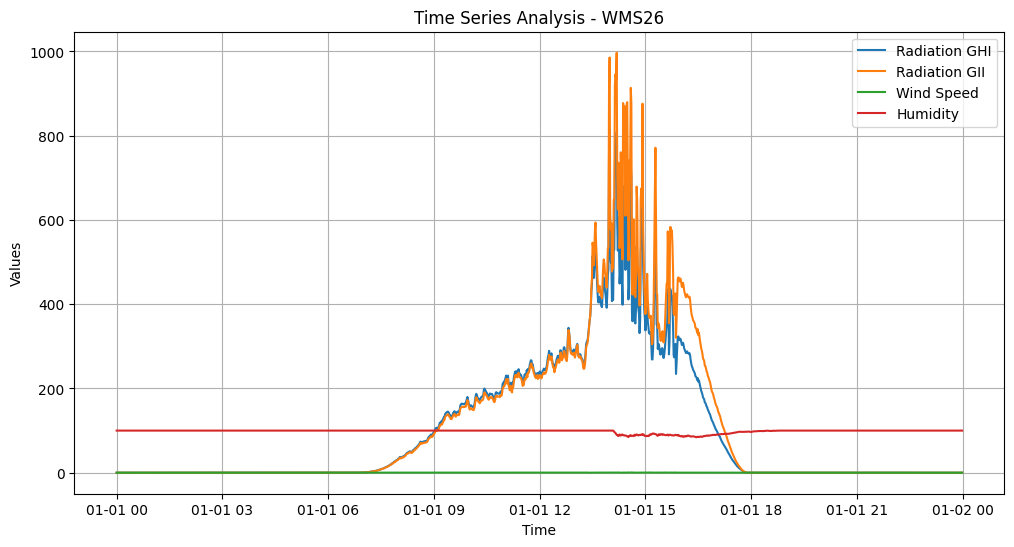

In [ ]:
# Plot time series for each sheet
columns_to_plot = ['Radiation GHI', 'Radiation GII', 'Wind Speed', 'Humidity']
for sheet, data in data_sheets.items():
    plot_time_series(data, columns_to_plot, sheet)

In [ ]:
# Reset index and clean column names before concatenating
all_data_cleaned = pd.concat(
    [data.reset_index(drop=True).assign(Sheet=sheet) for sheet, data in data_sheets.items()],
    ignore_index=True
)

# Drop rows where 'Wind Speed' is NaN (if any)
all_data_cleaned = all_data_cleaned.dropna(subset=['Wind Speed'])


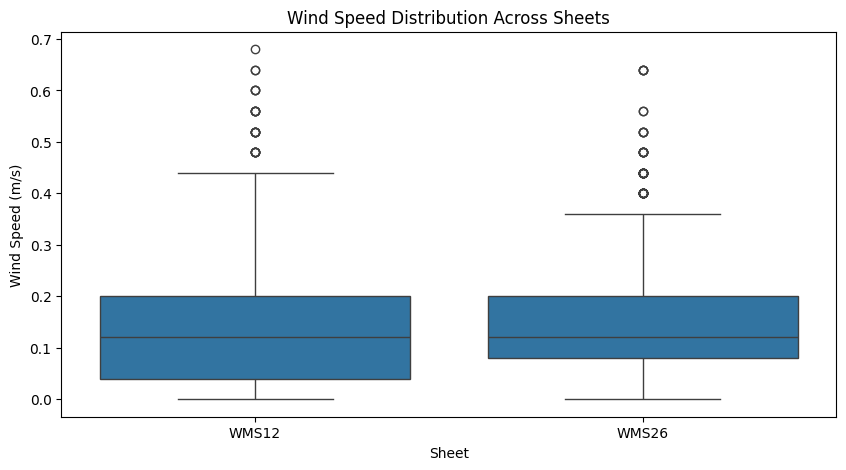

In [ ]:
# Boxplot for wind speed across sheets
plt.figure(figsize=(10, 5))
sns.boxplot(data=all_data_cleaned, x='Sheet', y='Wind Speed')
plt.title("Wind Speed Distribution Across Sheets")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Sheet")
plt.show()

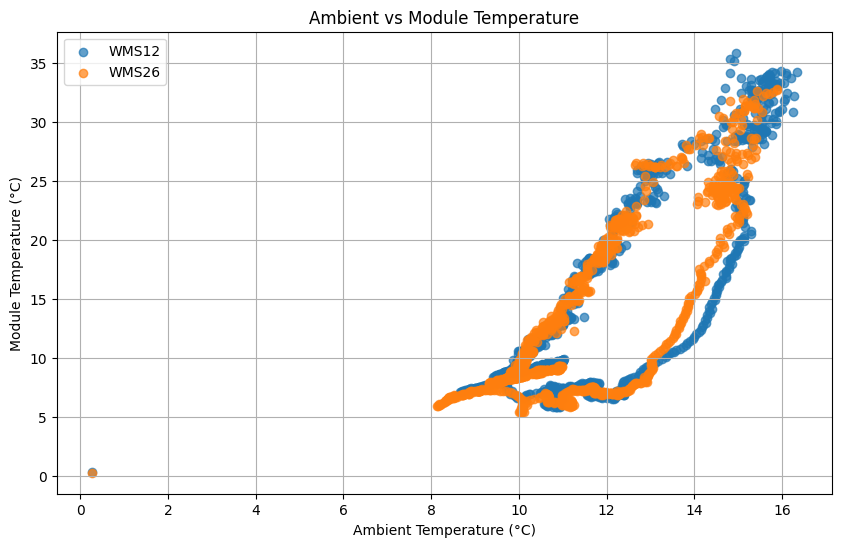

In [ ]:
# Scatter plot for Ambient vs Module Temperature
plt.figure(figsize=(10, 6))

for sheet, data in data_sheets.items():
    if 'Ambient Temperature' in data.columns and 'Module Temperature' in data.columns:
        # Convert to numeric, forcing errors to NaN
        data['Ambient Temperature'] = pd.to_numeric(data['Ambient Temperature'], errors='coerce')
        data['Module Temperature'] = pd.to_numeric(data['Module Temperature'], errors='coerce')

        # Drop rows with NaN values in these columns
        cleaned_data = data.dropna(subset=['Ambient Temperature', 'Module Temperature'])

        # Scatter plot
        plt.scatter(cleaned_data['Ambient Temperature'], cleaned_data['Module Temperature'],
                    label=sheet, alpha=0.7)

plt.title("Ambient vs Module Temperature")
plt.xlabel("Ambient Temperature (°C)")
plt.ylabel("Module Temperature (°C)")
plt.legend()
plt.grid()
plt.show()


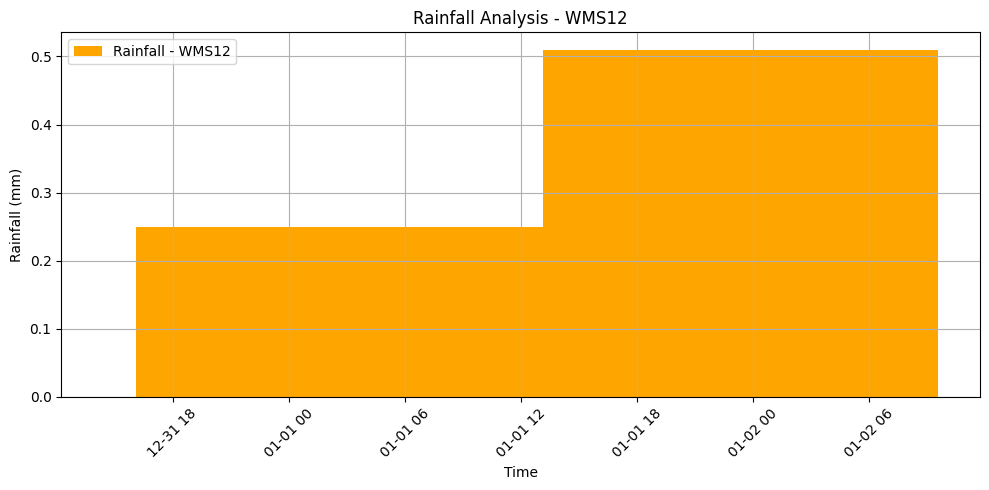

In [ ]:
# Clean column names for both sheets
for sheet, data in data_sheets.items():
    data.columns = data.columns.str.strip().str.replace("\n", " ", regex=True)

# Rainfall analysis
for sheet, data in data_sheets.items():
    if 'Time Stamp' in data.columns and 'Today Rain' in data.columns:
        # Convert 'Time Stamp' to datetime and drop invalid rows
        data['Time Stamp'] = pd.to_datetime(data['Time Stamp'], errors='coerce')
        data = data.dropna(subset=['Time Stamp'])  # Remove rows with invalid datetime

        # Plot rainfall data
        plt.figure(figsize=(10, 5))
        plt.bar(data['Time Stamp'], data['Today Rain'], color='orange', label=f"Rainfall - {sheet}")
        plt.title(f"Rainfall Analysis - {sheet}")
        plt.xlabel("Time")
        plt.ylabel("Rainfall (mm)")
        plt.xticks(rotation=45)
        plt.grid()
        plt.legend()
        plt.tight_layout()
        plt.show()